# Homework 03


## Part 1 - Questions

### Question 1: 

Where does the bean come from for those top-rated chocolate bars? 

* Who (population): not applicable
* What (subject, discipline): top-rated chocolate bars
* Where (location): the origin of cocoa beans
* When (snapshot, longitudinal): not applicable
* How much data do you need to do the analysis/work: data with chocolate bar ratings and their bean origins

### Question 2: 

How does the number of ingredients added to chocolate bars relate to their ratings?

* Who (population): not applicable
* What (subject, discipline): all sorts of chocolate bars and their ingredients
* Where (location): not applicable
* When (snapshot, longitudinal): not applicable
* How much data do you need to do the analysis/work: data with chocolate bar ratings and their ingredients

### Who Might Collect Relevant Data / What Articles or Publications Cite a Relevant Data Set?

Some sort of chocolate industry associations, food companies, or Kaggle

## Part 2 - Selecting a Data Set, Adding Documentation



1. Name / Title: chocolate_bars.csv
2. Link to Data: https://www.kaggle.com/datasets/evangower/chocolate-bar-ratings
3. Source / Origin: 
	* Author or Creator: EVAN GOWER
	* Publication Date: 2022/9/7
	* Publisher: Kaggle
	* Version or Data Accessed: 2022/9/29
4. License: Open Database License
5. Can You Use this Data Set for Your Intended Use Case? Yes!

## Format




### Overview

* Format: .csv
* Size: 66kb
* Number of Records: 2,531 rows



### Sample of Data




In [1]:
# show a few lines of data from the actual file
# Use "regular" Python to do this in this code block
# Assume that jupyter-lab was started in your root directory

with open('../data/raw/chocolate_bars.csv', 'r') as f: 
    lines = f.read()
    print(lines[:1030])

id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.5
2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.0
2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.0
2546,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80.0,3.0,"B,S,C","mildly bitter, basic cocoa, fatty",3.25
2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68.0,3.0,"B,S,C","milk brownie, macadamia,chewy",3.5
797,A. Morin,France,2012,Bolivia,Bolivia,70.0,4.0,"B,S,C,L","vegetal, nutty",3.5
797,A. Morin,France,2012,Peru,Peru,63.0,4.0,"B,S,C,L


### Fields or Column Headers

* Field/Column 1: id, str
* Field/Column 2: manufacturer, str
* Field/Column 3: company_location, str
* Field/Column 4: year_reviewed, str
* Field/Column 5: bean_origin, str
* Field/Column 6: bar_name, str
* Field/Column 7: cocoa_percent, float
* Field/Column 8: num_ingredients, float
* Field/Column 9: ingredients, str
* Field/Column 10: review, str
* Field/Column 11: rating, float

## Part 3 - Extract / Transform

* I'll use column 5(bean_origin), 8(num_ingredients) and 11(rating) to answer my questions;
* I'll convert the rating column into float, and the num_ingredients column into int;
* Some chocolate bars do not have ingredients data, and I'll drop those values


In [2]:
# read the file
import csv

with open('../data/raw/chocolate_bars.csv', 'r') as f: 
    next(f)
    reader = csv.reader(f)
    
    # extract three columns (Note: missing values are dropped during this process)
    origin = []
    rating = []
    ingredient_num = []
    for line in reader:
        if '' in line:
            continue
        origin.append(line[4])
        rating.append(line[10])
        ingredient_num.append(line[7])

    # transform rating column to float, and num_ingredients column into int
    rating = [float(i) for i in rating]
    ingredient_num = [int(float(i)) for i in ingredient_num]
    
    # store the data into numpy arrays
    import numpy as np
    origin = np.array(origin)
    rating = np.array(rating)
    ingredient_num = np.array(ingredient_num)

## Part 4 - Descriptive Statistics

### Analysis on Numeric Data

#### Central Tendency



In [3]:
# calculate the mean of ingredient_num and rating
print('The mean of all chocolate bars ingredients number is', np.mean(ingredient_num))
print('The mean of all chocolate bars ratings is', np.mean(rating))

The mean of all chocolate bars ingredients number is 3.0413426115431847
The mean of all chocolate bars ratings is 3.2100900532132624


#### Dispersion

In [4]:
# calculate the std of ingredient_num and rating
print('The standard deviation of all chocolate bar ingredients number is', np.std(ingredient_num))
print('The standard deviation of all chocolate bar ratings is', np.std(rating))

The standard deviation of all chocolate bar ingredients number is 0.913541281742799
The standard deviation of all chocolate bar ratings is 0.42828216881271136


#### Outliers


In [5]:
# calculate the min and max of ingredient_num and rating
print('The largest number of chocolate bar ingredients is', np.max(ingredient_num))
print('The smallest number of chocolate bar ingredients is', np.min(ingredient_num))
print('The highest chocolate bar rating is', np.max(rating))
print('The lowest chocolate bar rating is', np.min(rating))

The largest number of chocolate bar ingredients is 6
The smallest number of chocolate bar ingredients is 1
The highest chocolate bar rating is 4.0
The lowest chocolate bar rating is 1.0


#### Other


In [6]:
# calculate the range
print('There are', len(ingredient_num), 'records of data in total')

There are 2443 records of data in total


###  Analysis on Categorical Data

#### Frequency

In [7]:
# show frequency of all unique values in the origin column
unique, counts = np.unique(origin, return_counts=True)
print(np.array((unique, counts)).T)

[['Australia' '3']
 ['Belize' '74']
 ['Blend' '144']
 ['Bolivia' '79']
 ['Brazil' '77']
 ['Burma' '1']
 ['Cameroon' '3']
 ['China' '1']
 ['Colombia' '78']
 ['Congo' '11']
 ['Costa Rica' '42']
 ['Cuba' '12']
 ['DR Congo' '1']
 ['Dominican Republic' '220']
 ['Ecuador' '201']
 ['El Salvador' '6']
 ['Fiji' '16']
 ['Gabon' '1']
 ['Ghana' '36']
 ['Grenada' '17']
 ['Guatemala' '62']
 ['Haiti' '30']
 ['Honduras' '25']
 ['India' '35']
 ['Indonesia' '19']
 ['Ivory Coast' '6']
 ['Jamaica' '24']
 ['Liberia' '3']
 ['Madagascar' '171']
 ['Malaysia' '8']
 ['Martinique' '1']
 ['Mexico' '54']
 ['Nicaragua' '100']
 ['Nigeria' '2']
 ['Panama' '9']
 ['Papua New Guinea' '49']
 ['Peru' '231']
 ['Philippines' '24']
 ['Principe' '1']
 ['Puerto Rico' '7']
 ['Samoa' '3']
 ['Sao Tome' '14']
 ['Sao Tome & Principe' '2']
 ['Sierra Leone' '4']
 ['Solomon Islands' '10']
 ['Sri Lanka' '2']
 ['St. Lucia' '9']
 ['St.Vincent-Grenadines' '1']
 ['Sulawesi' '1']
 ['Sumatra' '1']
 ['Suriname' '1']
 ['Taiwan' '2']
 ['Tanzani

#### Unique Values

In [8]:
# show all unique values in the origin column
print(np.unique(origin, return_counts=False))

['Australia' 'Belize' 'Blend' 'Bolivia' 'Brazil' 'Burma' 'Cameroon'
 'China' 'Colombia' 'Congo' 'Costa Rica' 'Cuba' 'DR Congo'
 'Dominican Republic' 'Ecuador' 'El Salvador' 'Fiji' 'Gabon' 'Ghana'
 'Grenada' 'Guatemala' 'Haiti' 'Honduras' 'India' 'Indonesia'
 'Ivory Coast' 'Jamaica' 'Liberia' 'Madagascar' 'Malaysia' 'Martinique'
 'Mexico' 'Nicaragua' 'Nigeria' 'Panama' 'Papua New Guinea' 'Peru'
 'Philippines' 'Principe' 'Puerto Rico' 'Samoa' 'Sao Tome'
 'Sao Tome & Principe' 'Sierra Leone' 'Solomon Islands' 'Sri Lanka'
 'St. Lucia' 'St.Vincent-Grenadines' 'Sulawesi' 'Sumatra' 'Suriname'
 'Taiwan' 'Tanzania' 'Thailand' 'Tobago' 'Togo' 'Trinidad' 'U.S.A.'
 'Uganda' 'Vanuatu' 'Venezuela' 'Vietnam']


## Part 5 - Visualizations



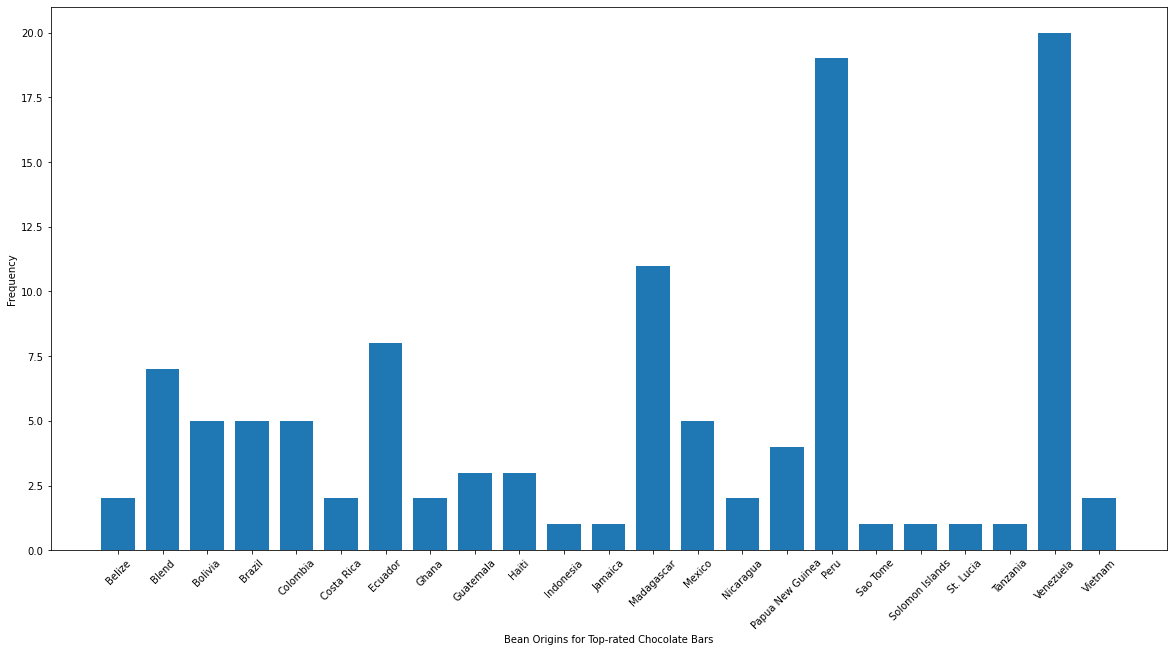

In [9]:
# show the bean origins of 4.00 rating chocolate bars
import matplotlib.pyplot as plt
high_rate_origin = np.array([origin[i] for i in range(len(rating)) if rating[i] == 4.00])
high_origins, freq = np.unique(high_rate_origin, return_counts=True)
fig = plt.figure(figsize = (20, 10))
plt.bar(high_origins,freq, width = 0.75)
plt.xticks(rotation = 45)
plt.xlabel('Bean Origins for Top-rated Chocolate Bars')
plt.ylabel('Frequency')
plt.show()

This bar plot shows the frequency of bean origins for top-rated (namely a 4.00 rating) chocolate bars. <br>
As some origins have really long names, 45 degree rotation is made to show the locations clearly.

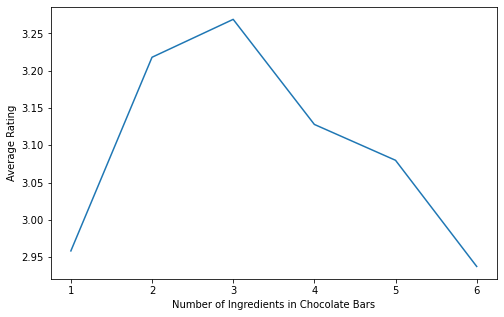

In [10]:
# show the average rating for chocolate bars with different number of ingredients
zipped = list(zip(ingredient_num, rating))
avg_rating = []
for i in range(1, 7):
    avg_rating.append(np.mean([k[1] for k in zipped if k[0] == i]))
fig2 = plt.figure(figsize = (8, 5))
plt.plot(range(1, 7), avg_rating)
plt.xlabel('Number of Ingredients in Chocolate Bars')
plt.ylabel('Average Rating')
plt.show()

This line plot shows the average rating of chocolate bars with different numbers of ingredients.

## Part 6 - Conclusion

* Yes, the process above helps me answer my original questions!
* From the first bar plot above, we may tell that the most frequent bean origin for 4.0 rating chocolate bars is Vebezuela. Peru and Madagascar are the second and third popular bean origins.
* From the second line plot above, we may notice that too much or too little ingredients may relate to lower ratings of chocolate bars. Chocolate bars with 3 ingredients have the highest average rating of higher than 3.25, while chocolate bars with up to 6 ingredients have the lowest average rating of lower than 2.95.

## Part 7 - Heights and Weights


The correlation between height and weight is 0.49597775550589135


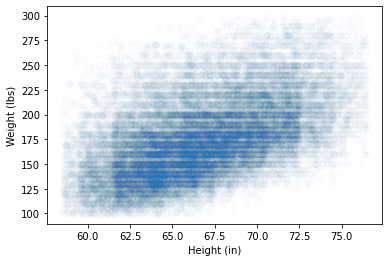

In [11]:
import random
with open('../adult19.csv', 'r') as f:
    next(f)
    data = csv.reader(f)
    
    height = []
    weight = []
    for line in data:
        if int(line[49]) < 996 and int(line[50]) < 96:
            weight.append(int(line[49]))
            height.append(int(line[50]))
    
    height = np.array(height)
    weight = np.array(weight)
    corr = np.corrcoef(height, weight)
    print("The correlation between height and weight is", corr[0][1])
    jitter = 0.5
    height = [h + random.uniform(-jitter, jitter) for h in height]
    weight = [w + random.uniform(-jitter, jitter) for w in weight]
    plt.scatter(height, weight, alpha = 0.01)
    plt.xlabel("Height (in)")
    plt.ylabel("Weight (lbs)")
    plt.show()